# Learn the usages of Pillow package

## References
https://pillow.readthedocs.io/en/latest/index.html
https://pillow.readthedocs.io/en/stable/index.html

In [21]:
from PIL import Image
from IPython.display import display
import numpy as np

In [23]:
a = np.full((1, 1), 300)
print(a.shape)
print(a)

(1, 1)
[[300]]


## Create image

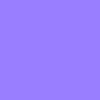

In [31]:
# Create an image from scratch
img_created = Image.new('RGB', (100, 100), (155, 125, 255))
display(img_created)

# Create image from numpy array

## Read and write image

In [26]:
img_file = "./data/obama.jpg"
img_src = Image.open(img_file)
print(img_src.format, img_src.size, img_src.mode)

value = img_src.getpixel((0, 0)) # get the RGB value
print(value)


JPEG (224, 224) RGB
(112, 93, 79)


## Some operations
https://auth0.com/blog/image-processing-in-python-with-pillow/#Resizing-Images

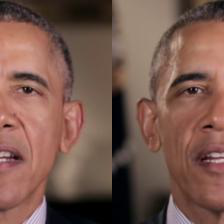

In [17]:
def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

img_roll = roll(img_src, 112)
display(img_roll)

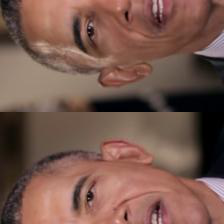

In [19]:
img_rotate = img_src.rotate(90)
display(img_rotate)

## Resize images

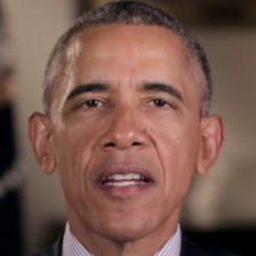

In [32]:
new_size = (256, 256)
img_resized = img_src.resize(new_size)
display(img_resized)